In [1]:
import os
os.chdir("..")

In [2]:
# Data structures
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
import pickle

# Necessary modules
from STRATEGY.BaseTradeEngine import BaseTradeEngine
from STRATEGY.Benchmark import Benchmark
from STRATEGY.Kalman import Kalman
from UTIL import FileIO
from UTIL import tradeUtil as tu
import seaborn as sns

# Debug Tools
import sys
import importlib
import warnings
warnings.filterwarnings("ignore")

# Statistical tools
import statsmodels.tsa.stattools as ts

/Users/Ferni/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# Read config
verbose = False

files = pd.DataFrame({'ODR': ['rya'],
         'ADR': ['ryaay']})

treatment1 = {'rm_outliers': False, 'rm_wide_spread': False, 'adjust_spread': False}

treatment2 = {'rm_outliers': True, 'rm_wide_spread': False, 'adjust_spread': False}

treatment3 = {'rm_outliers': True, 'rm_wide_spread': True, 'max_width': 10, 'adjust_spread': False}

treatment4 = {'rm_outliers': True, 'rm_wide_spread': True, 'max_width': 20, 'adjust_spread': False}

treatment5 = {'rm_outliers': True, 'rm_wide_spread': True, 'max_width': 20, 'adjust_spread': True, 'adjust_width': 10}

treatment6 = {'rm_outliers': True, 'rm_wide_spread': True, 'max_width': 20, 'adjust_spread': True, 'adjust_width': 7.5}

treatment7 = {'rm_outliers': False, 'rm_wide_spread': True, 'max_width': 20,'adjust_spread': True, 'adjust_width': 7.5}

treatments = [treatment1, treatment2, treatment3, treatment4, treatment5, treatment6, treatment7]
treatments = [treatment2]

output = []
opt_settings = []

-----------------------------------------------------------------------
rya vs ryaay pair trading using OLS_Inter and treatment T0
-----------------------------------------------------------------------
Observations in source  | ryaay : 110795 , rya : 134001 
After merging on date   | ryaay : 27152 , rya : 27152 
After applying filters  | ryaay : 26454 , rya : 26454 



100%|██████████| 4/4 [00:14<00:00,  3.72s/it]


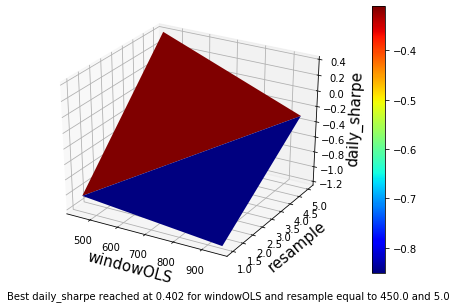


100%|██████████| 16/16 [00:28<00:00,  1.75s/it]


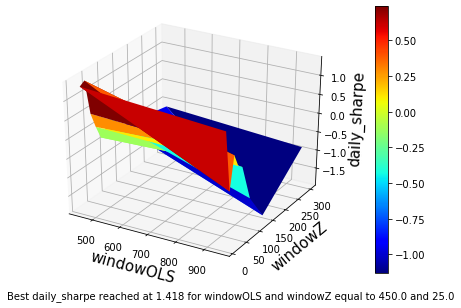


100%|██████████| 56/56 [00:12<00:00,  4.63it/s]


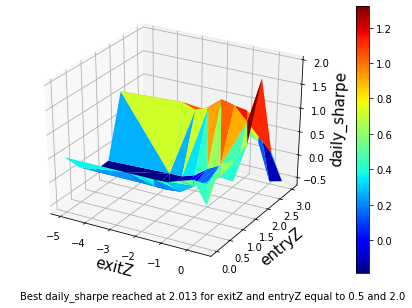


100%|██████████| 14/14 [00:58<00:00,  4.18s/it]


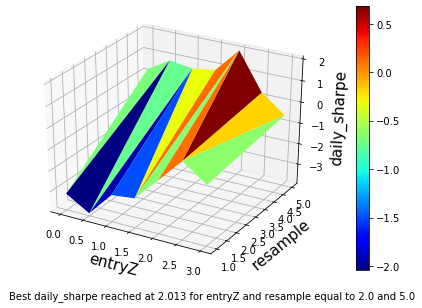


100%|██████████| 6/6 [00:01<00:00,  5.81it/s]


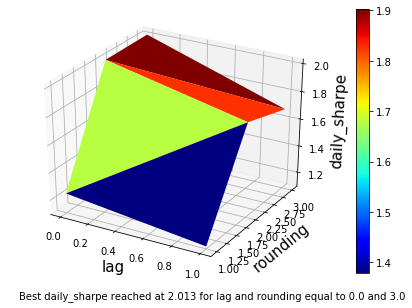

{'entryZ': 2.0, 'exitZ': 0.5, 'lag': 0.0, 'resample': 5.0, 'rounding': 3.0, 'windowZ': 25.0, 'windowOLS': 450.0, 'transaction_cost': 0.0063}


In [7]:
default = {'entryZ': 2, 'exitZ': -1, 'lag': 0, 'resample': 5, 'rounding': 3, 'windowZ':120, 'windowOLS':150,
          'transaction_cost':0.0063}

values  =  {'entryZ': list(np.arange(0, 3.1, 0.5)), 'exitZ': [-5] + list(np.arange(-2.5, 0.6, 0.5)), 
           'lag': [0,1], 'resample': [1,5], 'rounding': [1,2,3], 
            'windowZ': list(np.arange(10, 71, 15)) + [100,150,300], 
            'windowOLS': list(np.arange(450, 1000, 500)) }

order   = np.array([['windowOLS','resample'],['windowOLS','windowZ'],['exitZ','entryZ'],
                    ['entryZ','resample'],  ['lag','rounding']])

for i, treat in enumerate(treatments):
    for index, row in files.iterrows():
        train_out, test_out, opt_set = tu.backtest_model(row['ODR'], row['ADR'], Benchmark, default, treat, 
                                             values, order, version = "OLS_Inter", clean_version = ("T" + str(i)))
        output.extend(list((train_out,test_out)))
        opt_settings.append(opt_set)
    


------------------------------------------
rya vs ryaay pair trading using Kalman
------------------------------------------
Observations in source  | ryaay : 110795 , rya : 134001 
After merging on date   | ryaay : 27152 , rya : 27152 
After applying filters  | ryaay : 27152 , rya : 27152 


100%|██████████| 8/8 [00:01<00:00,  5.34it/s]


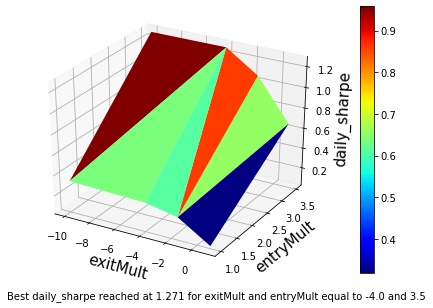

100%|██████████| 4/4 [00:37<00:00,  9.32s/it]


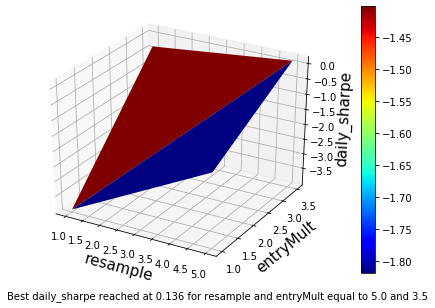

100%|██████████| 8/8 [00:02<00:00,  2.94it/s]


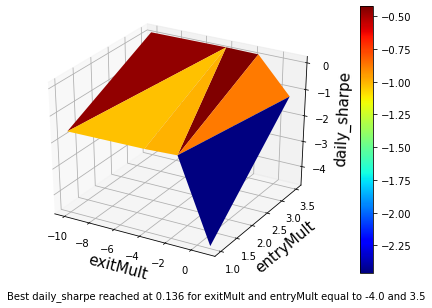

100%|██████████| 4/4 [00:42<00:00, 10.54s/it]


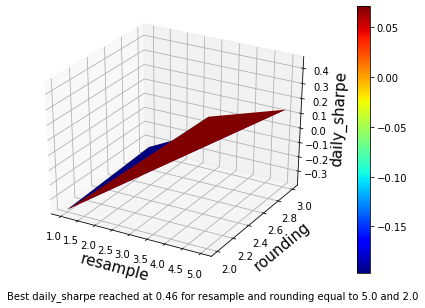

{'lag': 0, 'resample': 5.0, 'rounding': 2.0, 'entryMult': 3.5, 'exitMult': -4.0, 'transaction_cost': 0.0063}
------------------------------------------
ulvr vs ul pair trading using Kalman
------------------------------------------
Observations in source  | ul : 157682 , ulvr : 134550 
After merging on date   | ul : 31631 , ulvr : 31631 
After applying filters  | ul : 31631 , ulvr : 31631 


100%|██████████| 8/8 [00:01<00:00,  5.89it/s]


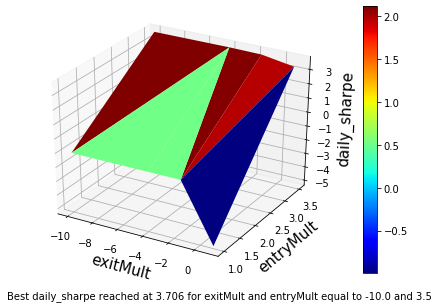

100%|██████████| 4/4 [00:42<00:00, 10.56s/it]


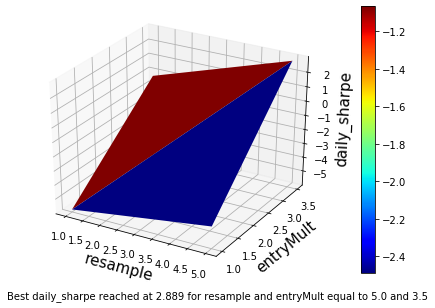

100%|██████████| 8/8 [00:01<00:00,  7.08it/s]


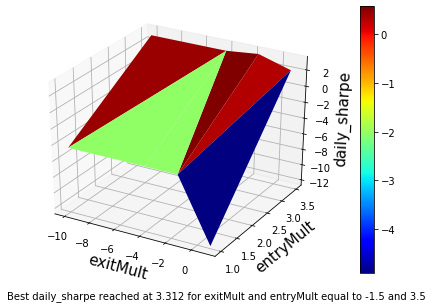

100%|██████████| 4/4 [00:35<00:00,  8.87s/it]


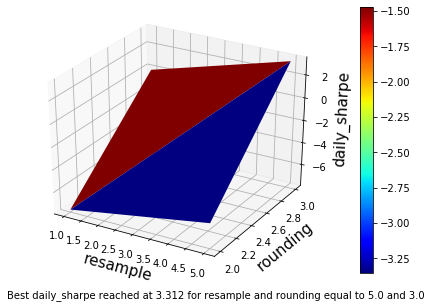

{'lag': 0, 'resample': 5.0, 'rounding': 3.0, 'entryMult': 3.5, 'exitMult': -1.5, 'transaction_cost': 0.0063}
------------------------------------------
bpln vs bp pair trading using Kalman
------------------------------------------
Observations in source  | bp : 159878 , bpln : 170453 
After merging on date   | bp : 36055 , bpln : 36055 
After applying filters  | bp : 36055 , bpln : 36055 


100%|██████████| 8/8 [00:01<00:00,  7.63it/s]


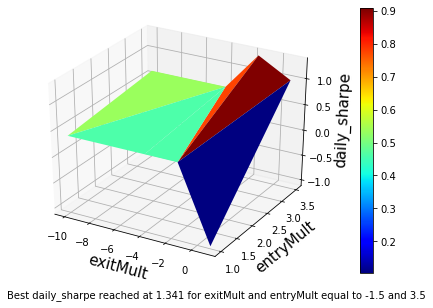

100%|██████████| 4/4 [00:40<00:00, 10.07s/it]


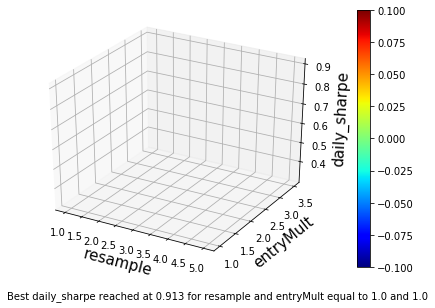

100%|██████████| 8/8 [00:34<00:00,  4.31s/it]


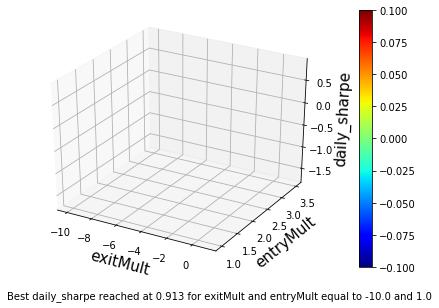

100%|██████████| 4/4 [00:10<00:00,  2.53s/it]


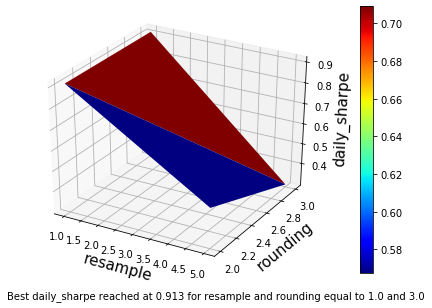

{'lag': 0, 'resample': 1.0, 'rounding': 3.0, 'entryMult': 1.0, 'exitMult': -10.0, 'transaction_cost': 0.0063}
------------------------------------------
hsbcln vs hsbc pair trading using Kalman
------------------------------------------
Observations in source  | hsbc : 158089 , hsbcln : 168684 
After merging on date   | hsbc : 35856 , hsbcln : 35856 
After applying filters  | hsbc : 35856 , hsbcln : 35856 


100%|██████████| 8/8 [00:01<00:00,  7.38it/s]


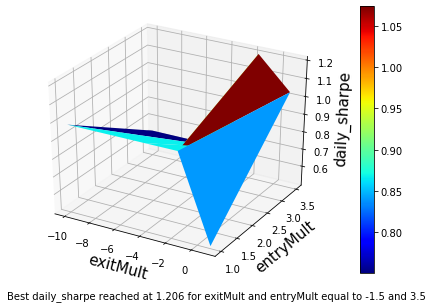

100%|██████████| 4/4 [00:42<00:00, 10.66s/it]


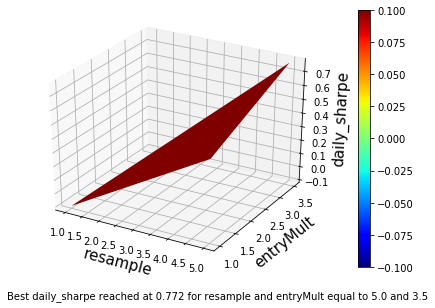

100%|██████████| 8/8 [00:01<00:00,  6.41it/s]


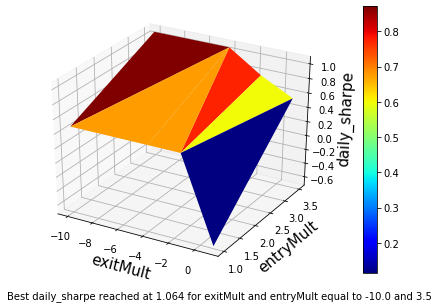

100%|██████████| 4/4 [00:38<00:00,  9.71s/it]


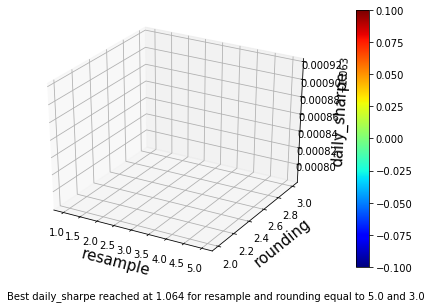

{'lag': 0, 'resample': 5.0, 'rounding': 3.0, 'entryMult': 3.5, 'exitMult': -10.0, 'transaction_cost': 0.0063}
------------------------------------------
rya vs ryaay pair trading using Kalman
------------------------------------------
Observations in source  | ryaay : 110795 , rya : 134001 
After merging on date   | ryaay : 27152 , rya : 27152 
After applying filters  | ryaay : 27152 , rya : 27152 


100%|██████████| 8/8 [00:01<00:00,  7.51it/s]


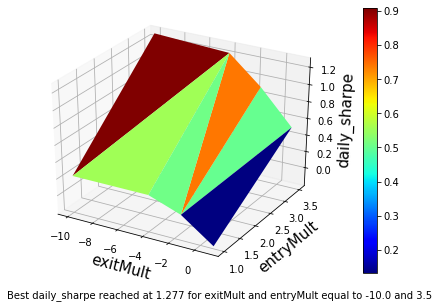

100%|██████████| 4/4 [00:29<00:00,  7.40s/it]


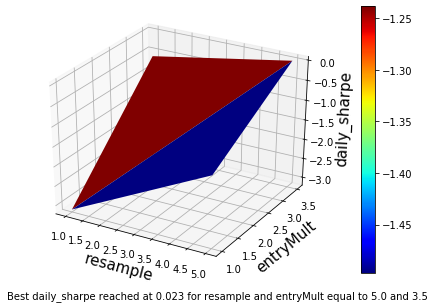

100%|██████████| 8/8 [00:01<00:00,  7.40it/s]


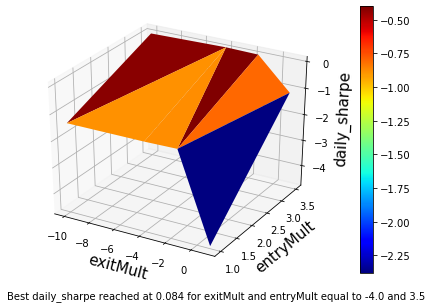

100%|██████████| 4/4 [00:29<00:00,  7.40s/it]


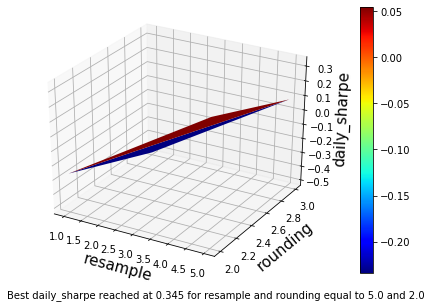

{'lag': 0, 'resample': 5.0, 'rounding': 2.0, 'entryMult': 3.5, 'exitMult': -4.0, 'transaction_cost': 0.0063}
------------------------------------------
ulvr vs ul pair trading using Kalman
------------------------------------------
Observations in source  | ul : 157682 , ulvr : 134550 
After merging on date   | ul : 31631 , ulvr : 31631 
After applying filters  | ul : 31631 , ulvr : 31631 


100%|██████████| 8/8 [00:01<00:00,  7.85it/s]


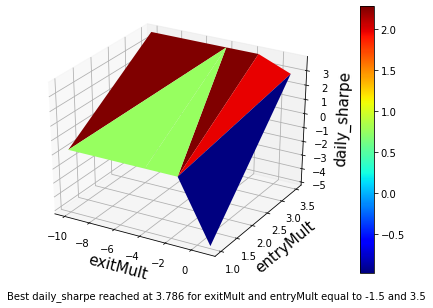

100%|██████████| 4/4 [00:33<00:00,  8.29s/it]


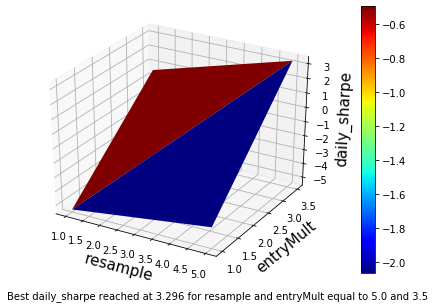

100%|██████████| 8/8 [00:02<00:00,  3.13it/s]


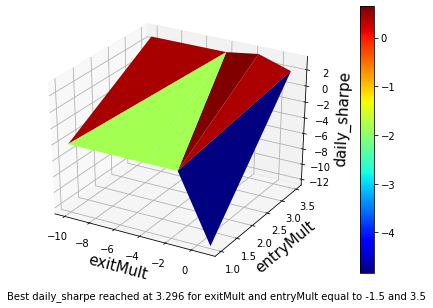

100%|██████████| 4/4 [00:38<00:00,  9.54s/it]


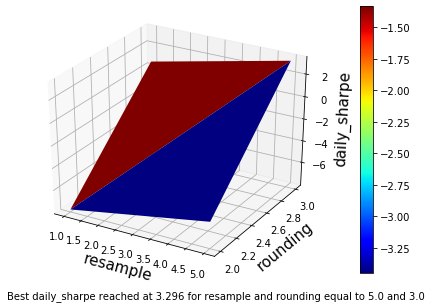

{'lag': 0, 'resample': 5.0, 'rounding': 3.0, 'entryMult': 3.5, 'exitMult': -1.5, 'transaction_cost': 0.0063}
------------------------------------------
bpln vs bp pair trading using Kalman
------------------------------------------
Observations in source  | bp : 159878 , bpln : 170453 
After merging on date   | bp : 36055 , bpln : 36055 
After applying filters  | bp : 36055 , bpln : 36055 


100%|██████████| 8/8 [00:00<00:00,  8.22it/s]


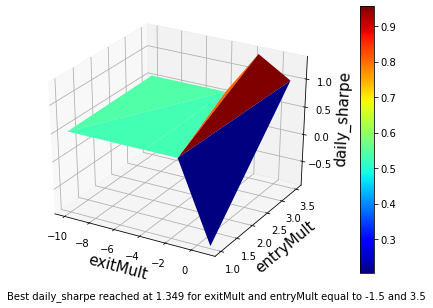

100%|██████████| 4/4 [00:49<00:00, 12.25s/it]


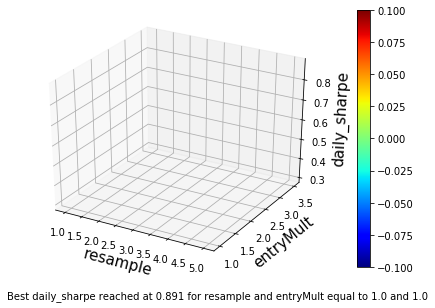

100%|██████████| 8/8 [00:35<00:00,  4.39s/it]


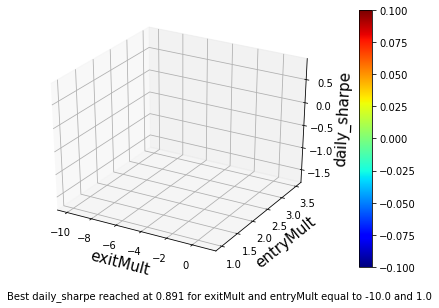

100%|██████████| 4/4 [00:07<00:00,  1.85s/it]


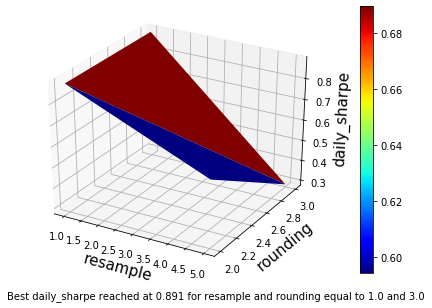

{'lag': 0, 'resample': 1.0, 'rounding': 3.0, 'entryMult': 1.0, 'exitMult': -10.0, 'transaction_cost': 0.0063}
------------------------------------------
hsbcln vs hsbc pair trading using Kalman
------------------------------------------
Observations in source  | hsbc : 158089 , hsbcln : 168684 
After merging on date   | hsbc : 35856 , hsbcln : 35856 
After applying filters  | hsbc : 35856 , hsbcln : 35856 


100%|██████████| 8/8 [00:00<00:00,  8.21it/s]


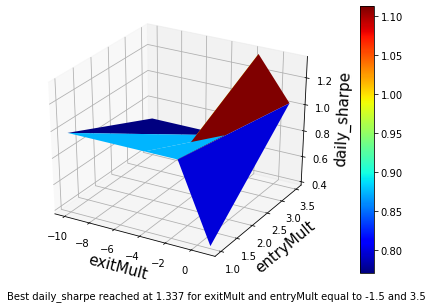

100%|██████████| 4/4 [00:37<00:00,  9.43s/it]


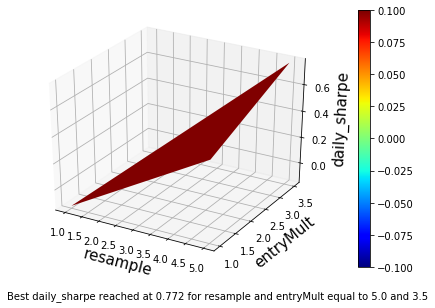

100%|██████████| 8/8 [00:01<00:00,  7.25it/s]


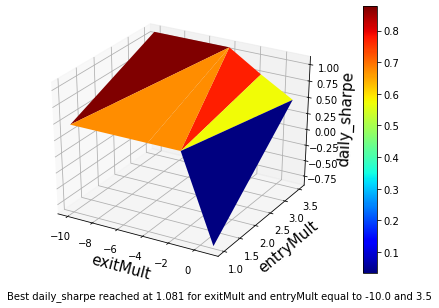

100%|██████████| 4/4 [00:37<00:00,  9.50s/it]


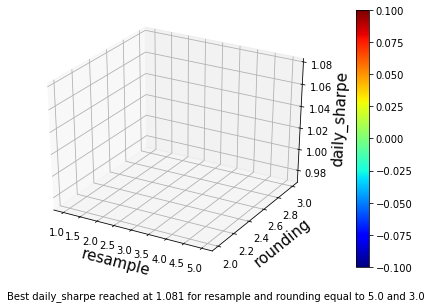

{'lag': 0, 'resample': 5.0, 'rounding': 3.0, 'entryMult': 3.5, 'exitMult': -10.0, 'transaction_cost': 0.0063}


In [10]:
default = {'lag': 0, 'resample': 5, 'rounding': 3,  'entryMult':2, 'exitMult':-3, 'transaction_cost': 0.0063}

values  =  {'lag': [0,1,2,5], 'resample': [1,5,10,20,60,300], 'rounding': [1,2,3], 
            'entryMult': list(np.arange(0.5, 5.1, 0.5)), 'exitMult': [-5] + list(np.arange(0.5, -3.1, -0.5))}


order   = np.array([['resample','entryMult'],['exitMult','entryMult'],['lag','rounding']])

for i, treat in enumerate(treatments):
    for index, row in files.iterrows():
        train_out, test_out, opt_set = tu.backtest_model(row['ODR'], row['ADR'], Kalman, default, treat, 
                                             values, order, version = "Kalman", clean_version = "T" +str(i))
        output.extend(list((train_out,test_out)))
        opt_settings.append(opt_set)

In [11]:
results = pd.concat(output, axis=1)
results.columns = pd.MultiIndex.from_tuples(results.columns, names=['Data','Sample','Model','Treatment'])
display(results.transpose().sort_index(level = 'Data').style.background_gradient())


In [210]:
#results.xs(('KalmanSmooth','Kalman'),level='Model',axis=1).transpose().sort_index(level = 'Data').style.background_gradient()
#np.mean(results.xs('KalmanSmooth',level='Model',axis=1).xs('test',level='Sample',axis=1).loc['sharpe_ratio'])
#print(np.mean(results.xs('Kalman',level='Model',axis=1).xs('test',level='Sample',axis=1).loc['sharpe_ratio']))


